## Assignment 3 - Histogram Inittialization - Image Processing - Vedasri nakka

In [1]:
!pip3 install opencv-python



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [233]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### 1. Colors separation and reconstruction
#### a. Use an existing library to separate the three channels of your RGB image and show each of them separately.

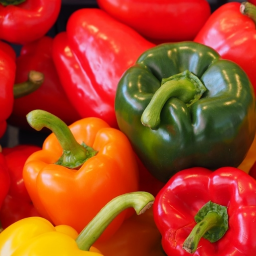

In [234]:
# Loading RGB image
peppers = Image.open("Peppers.png")

peppers

In [235]:
# Load the image using cv2 package
image = cv2.imread('Peppers.png')


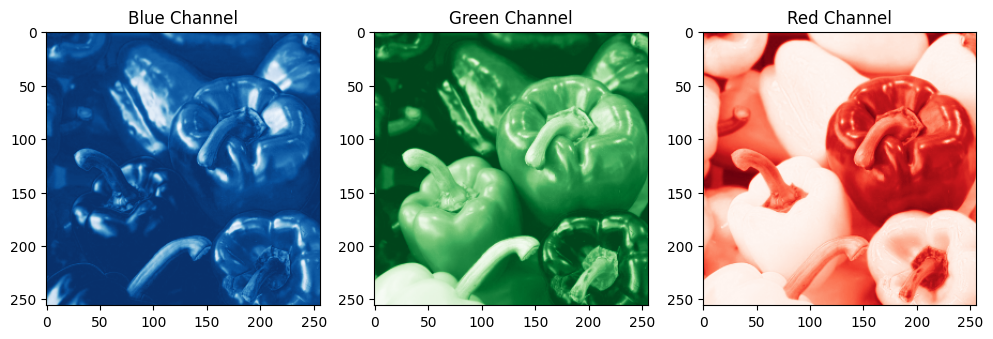

In [307]:
# Spliting the image into R, G, and B channels
b, g, r = cv2.split(image)

# print(r.shape)
# cv2.imshow(image,r)

# Displaying 3 channels 
plt.figure(figsize=(12, 4))
plt.subplot(133), plt.imshow(r, cmap='Reds_r'), plt.title('Red Channel')
plt.subplot(132), plt.imshow(g, cmap='Greens_r'), plt.title('Green Channel')
plt.subplot(131), plt.imshow(b, cmap='Blues_r'), plt.title('Blue Channel')
plt.show()

#### b. Write your own algorithm to separate an RGB image into the three channels of the HSL color space (H, S, L). See https://www.rapidtables.com/convert/color/rgb-to-hsl.html

[[0.08007812 0.0859375  0.09570312 ... 0.35351562 0.36914062 0.37890625]
 [0.109375   0.09960938 0.1015625  ... 0.33789062 0.35351562 0.37109375]
 [0.13671875 0.15625    0.140625   ... 0.3203125  0.34570312 0.36132812]
 ...
 [0.7324219  0.8027344  0.8300781  ... 0.41601562 0.41015625 0.40625   ]
 [0.74609375 0.80859375 0.8339844  ... 0.4140625  0.40820312 0.41210938]
 [0.7558594  0.8125     0.8417969  ... 0.41015625 0.40625    0.41601562]]


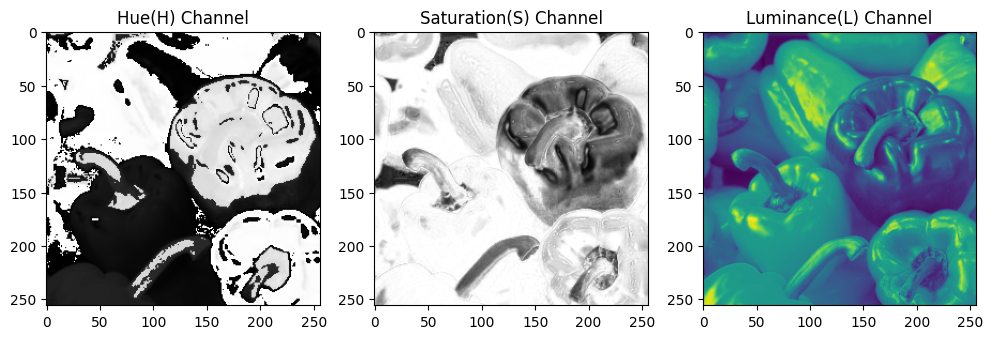

In [309]:
def rgb_to_hsl(rgb_image):
    hsl_image = np.empty_like(rgb_image, dtype=np.float32)

    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            b, g, r = rgb_image[i, j] 

            #print(b, g, r)
            b, g, r = b/ 256.0, g/ 256.0, r/ 256.0

            cmax = max(r, g, b)
            cmin = min(r, g, b)
            delta = cmax - cmin

            
            l = (cmax + cmin) / 2.0  

            if delta == 0:           
                s = 0
            else:
                s = delta / (1 - abs(2 * l - 1))

            if delta == 0:           
                h = 0         
            elif cmax == r:
                h = 60 * (((g - b) / delta) % 6)
            elif cmax == g:
                h = 60 * (((b - r) / delta) % 6)
            else:
                h = 60 * (((r - g) / delta) % 6)

            hsl_image[i, j] = [h, s , l ]
            #print(hsl_image[i, j])

    return hsl_image

# Converting RGB to HSL
hsl_image = rgb_to_hsl(image)

#hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


cv2.imshow("HSL image", hsl_image)

# Splitting HSL channels
h, s, l = cv2.split(hsl_image)

print(l)

# Displaying 3 channels
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(h, cmap= 'gray'), plt.title('Hue(H) Channel')
plt.subplot(132), plt.imshow(s, cmap= 'gray'), plt.title('Saturation(S) Channel')
plt.subplot(133), plt.imshow(l, ), plt.title('Luminance(L) Channel')
plt.show()


In [250]:
cv2.imshow("HSL image", hsl_image)


In [251]:
print(hsl_image.shape)
print(image.shape)
print(peppers.size)

(256, 256, 3)
(256, 256, 3)
(256, 256)


#### c. Write your own algorithm to reconstruct an RGB image from the H, S, L channels. See https://www.rapidtables.com/convert/color/hsl-to-rgb.html

In [252]:
def hsl_to_rgb(hsl_image):
    rgb_image = np.empty_like(hsl_image, dtype=np.uint8)

    for i in range(hsl_image.shape[0]):
        for j in range(hsl_image.shape[1]):
            h, s, l = hsl_image[i, j]

            #print(h)

            c = (1 - abs(2 * l - 1)) * s 
            x = c * (1 - abs((h / 60) % 2 - 1))
            m = l - c / 2

            if h >= 0 and h < 60:
                r, g, b = c, x, 0
            elif h >= 60 and h < 120:
                r, g, b = x, c, 0
            elif h >= 120 and h < 180:
                r, g, b = 0, c, x
            elif h >= 180 and h < 240:
                r, g, b = 0, x, c
            elif h >= 240 and h < 300:
                r, g, b = x, 0, c
            else:
                r, g, b = c, 0, x

            r, g, b = (r + m) * 255, (g + m) * 255, (b + m) * 255
            rgb_image[i, j] = [int(r), int(g), int(b)]
            #print(rgb_image[i, j])

    return rgb_image

# Reconstruct RGB from HSL
reconstructed_rgb = np.array(hsl_to_rgb(hsl_image))
reconstructed_rgb

#reconstructed_rgb = cv2.cvtColor(hsl_image, cv2.COLOR_HSV2RGB)



array([[[ 30,  30,   9],
        [ 30,  12,  27],
        [ 32,  15,  26],
        ...,
        [180,   0,  11],
        [187,   0,  12],
        [192,   0,  13]],

       [[ 42,  36,  12],
        [ 36,  13,  35],
        [ 36,  14,  33],
        ...,
        [172,   0,  11],
        [180,   0,  12],
        [187,   1,  13]],

       [[ 59,  31,   9],
        [ 62,  42,  16],
        [ 56,  44,  14],
        ...,
        [162,   0,  10],
        [175,   0,  11],
        [184,   0,  12]],

       ...,

       [[241, 207, 132],
        [241, 216, 168],
        [238, 220, 185],
        ...,
        [201,  10,  18],
        [199,   9,  18],
        [196,  10,  20]],

       [[240, 208, 140],
        [240, 217, 172],
        [239, 219, 186],
        ...,
        [199,  11,  16],
        [197,  10,  16],
        [197,  12,  19]],

       [[239, 210, 146],
        [240, 217, 174],
        [240, 221, 189],
        ...,
        [198,  10,  16],
        [196,  10,  16],
        [198,  13,  20]]

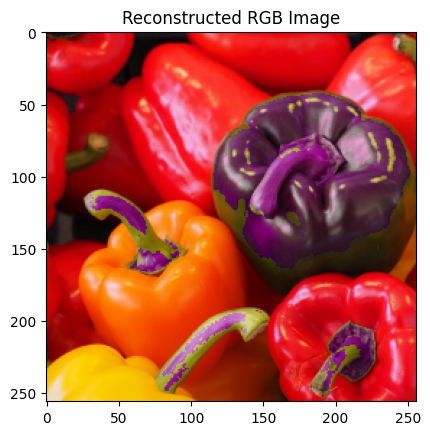

In [253]:
# Showing the reconstructed RGB image
plt.imshow(reconstructed_rgb)
plt.title('Reconstructed RGB Image')
plt.show()

### 2. Greyscale Histogram Equalization
#### a. Write your own histogram equalization algorithm based on the method presented in the lecture.

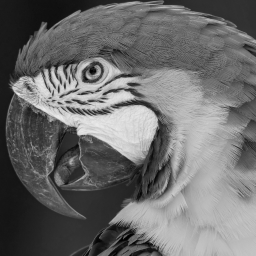

In [242]:
ara = Image.open('Ara.png')
ara

In [372]:
def histogram_equalization(image):
    image_array = np.array(image)
      
    # Calculate the histogram 
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image_array.flatten():
        histogram[pixel_value] += 1

    # Calculate the cumulative distribution function (CDF) manually
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    #plt.plot(histogram)
    #splt.show()

    # Normalize the CDF to the range [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Map the pixel values of the input image to the equalized values using the CDF
    equalized_image = cdf_normalized[image_array]
    
    # Converting the result image to the same data type as the input image
    equalized_image = equalized_image.astype(np.uint8)

    histogram = np.zeros(256, dtype=int)
    for pixel_value in equalized_image.flatten():
        histogram[pixel_value] += 1
    #plt.plot(histogram)
    #plt.show()

    return equalized_image


#### b. Apply your algorithm on the greyscale images provided on ILIAS.

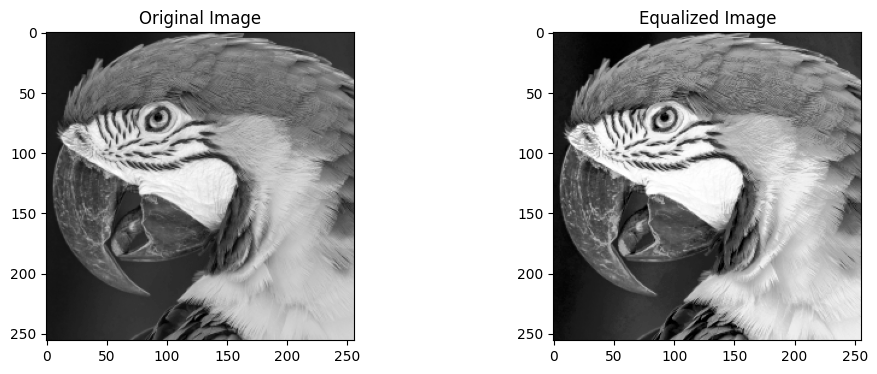

In [373]:
#gray_image = cv2.imread('Ara.png', cv2.IMREAD_GRAYSCALE)
equalized_image = histogram_equalization(ara)

cv2.imwrite("equalized_greyscale_image.png", equalized_image)

# Plotting the original and equalized images
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(ara, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()

### 3. Color Histogram Equalization
#### a. Firstly, apply your histogram equalization algorithm on the R, G, and B channels and reconstruct your image.

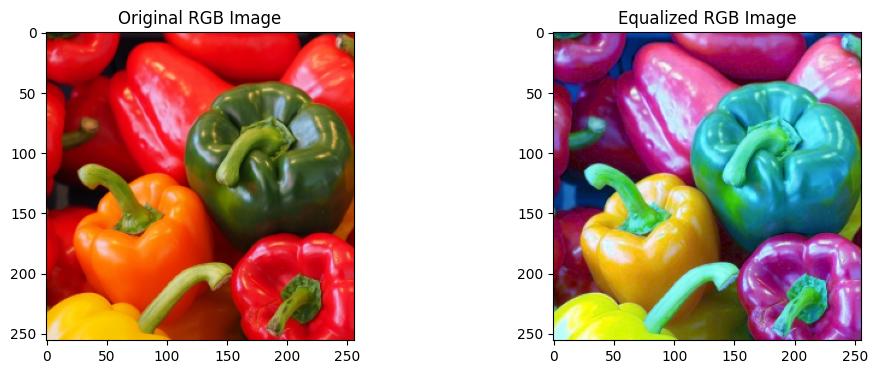

In [374]:
image = cv2.imread('Peppers.png')
r, g, b = cv2.split(image)
#r,g,b = peppers.split()

# Applying histogram equalization to each channel
equalized_r = histogram_equalization(r)
equalized_g = histogram_equalization(g)
equalized_b = histogram_equalization(b)

# Reconstructing the equalized RGB image
equalized_rgb_image = cv2.merge((equalized_r, equalized_g, equalized_b))

cv2.imwrite("equalised_rgb_image.png", equalized_rgb_image)

# Plot the original and equalized RGB images
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)), plt.title('Original RGB Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(equalized_rgb_image, cv2.COLOR_BGR2RGB)), plt.title('Equalized RGB Image')
plt.show()

#### b. Secondly, apply the histogram equalization on the L channel of your HSL image and reconstruct your image with the new L channel and the original H and S channels. Convert the result on an RGB image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


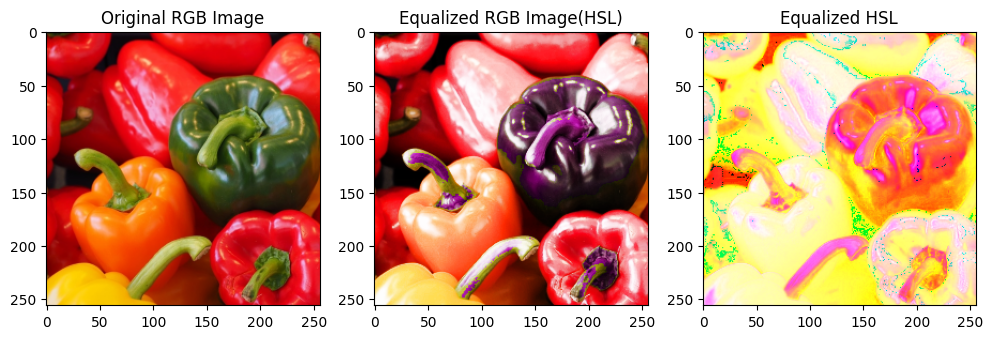

In [384]:
image = cv2.imread('Peppers.png')
hsl_image = rgb_to_hsl(image)
#Whsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, l = cv2.split(hsl_image)
equalized_l = histogram_equalization((l*255).astype('uint8'))

equalized_hsl_image = cv2.merge((h, s, equalized_l.astype('float32')/255.0)) 
cv2.imwrite("equalised_hsl_image.png", cv2.cvtColor(equalized_hsl_image, cv2.COLOR_BGR2RGB))

equalized_rgb_image_l_channel = hsl_to_rgb(equalized_hsl_image)
#equalized_rgb_image_l_channel_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite("equalized_rgb_image_l_channel.png", cv2.cvtColor(equalized_rgb_image_l_channel, cv2.COLOR_BGR2RGB))


plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)), plt.title('Original RGB Image')
plt.subplot(132), plt.imshow(equalized_rgb_image_l_channel), plt.title('Equalized RGB Image(HSL)')
plt.subplot(133), plt.imshow(equalized_hsl_image), plt.title('Equalized HSL')
plt.show()

#### c. Visually compare the result of the two images after equalizing the histograms (RGB and HSL). What can you observe?

- The equalization in RGB space results in more vivid and contrast-enhanced colors, and color shifts.

- The equalization in HSL space mainly affects the brightness and contrast while preserving the hue (color) and saturation (intensity), resulting in a more natural color appearance. But After converting the result of HSL to RGB we can observe high contrast then original and less saturation